# Deep Reinforcement Learning using AlphaZero methodology

Adapted from https://applied-data.science/blog/how-to-build-your-own-alphazero-ai-using-python-and-keras/

In [199]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Game will control all the mechanisms to play a game, and agent will emulate a player:

In [200]:
from game import Game
from agent import Agent

To be able to display the board, we need to create a logger. Here we just print the board to the standard output, to get a graps of the current situation

In [201]:
class mylogger:
    def __init__():
        pass
    def info(log):
        # log is a list of chars resembling the board
        print(str(log) + "\n")

## Playing a first game by hand

In [54]:
# Let's play a game by hand
game = Game()

What can we do in the game?

In [55]:
game.gameState.allowedActions

[35, 36, 37, 38, 39, 40, 41]

This is what the board looks like:

In [56]:
game.gameState.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

--------------



So when we introduce a token by the top, it will fall to the bottom. At the bottom, we have the positions 35 to 41, so those are the only actions we can do now.

For instance, let's put a token right in the middle, it will fall to the middle position at the bottom, that's position 38

In [57]:
game.step(38)
game.gameState.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', 'X', '-', '-', '-']

--------------



There are two players in this game, 1 and -1. The first player was 1, so the current player should be -1:

In [58]:
game.currentPlayer

-1

Let's now see what this player can do:


In [59]:
game.gameState.allowedActions

[31, 35, 36, 37, 39, 40, 41]

Because position 38 is taken, now the player -1 could put a token on top of it, that's it, position 31. Let's check it out:

In [60]:
game.step(31)
game.gameState.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['-', '-', '-', 'X', '-', '-', '-']

--------------



Who's the next player?

In [61]:
game.currentPlayer

1

How is the game going?

In [62]:
game.gameState.score

(0, 0)

This is the count of games won by each one of the players. Let's make player -1 win the game

In [63]:
game.gameState.allowedActions

[24, 35, 36, 37, 39, 40, 41]

In [64]:
game.step(35)
game.gameState.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['X', '-', '-', 'X', '-', '-', '-']

--------------



In [65]:
game.step(24)
game.gameState.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['X', '-', '-', 'X', '-', '-', '-']

--------------



In [66]:
game.step(36)
game.step(17)

(<game.GameState at 0x7fc5a680ecf8>, 0, 0, None)

The second element of the tuple is the value. The value 0 means that nothing has happened yet.

In [67]:
game.gameState.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['X', 'X', '-', 'X', '-', '-', '-']

--------------



If player 1 moves to position 37, then player 1 will win. But player 1 is dumb, so the next moves are:

In [68]:
game.step(39)

(<game.GameState at 0x7fc5a680e860>, 0, 0, None)

In [69]:
game.step(10)

(<game.GameState at 0x7fc5a680e898>, -1, 1, None)

In [70]:
game.gameState.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['X', 'X', '-', 'X', 'X', '-', '-']

--------------



To see the score of the game, we have to check who is the current player:

In [71]:
game.currentPlayer

1

And then get the first value of these tuple. The winner of the game is the multiplication of both values:

In [73]:
game.gameState.score

(-1, 1)

In [81]:
print("And the winner is %d" % (game.currentPlayer*game.gameState.score[0]))

And the winner is 0


Let's keep playing. We need to clear the board to keep playing, because the game goal is to be the first to make a 4-connect. Once that's done, newer 4-connect will not contribute towards the score:

In [82]:
game.reset()

In [83]:
game.step(38)
game.step(31)
game.step(35)
game.step(24)
game.step(36)
game.step(17)

(<game.GameState at 0x7fc5a68c5630>, 0, 0, None)

In [84]:
game.gameState.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['X', 'X', '-', 'X', '-', '-', '-']

--------------



Now player 1 has learnt, and will do the right thing:

In [85]:
game.currentPlayer

1

In [86]:
game.step(37)

(<game.GameState at 0x7fc5a680eef0>, -1, 1, None)

In [87]:
game.gameState.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['-', '-', '-', 'O', '-', '-', '-']

['X', 'X', 'X', 'X', '-', '-', '-']

--------------



In [88]:
game.gameState.score

(-1, 1)

In [89]:
print("And the winner is %d" % (game.currentPlayer*game.gameState.score[0]))

And the winner is 1


To detect that a game has finished, we can monitor the score, or the value returned by each step. When it is different to 0, that means that there has been a winning move.

## Playing the game with an agent

To train a neural network using the results of our games, we need to use an agent. The agent needs to use an untrained neural network as input

In [175]:
game = Game()

For the neural network, we can use any Keras model. Here, we use a function from the game, that needs some configuration:

In [176]:
from model import Residual_CNN

In [177]:
HIDDEN_CNN_LAYERS = [
	{'filters':75, 'kernel_size': (4,4)}
	 , {'filters':75, 'kernel_size': (4,4)}
	 , {'filters':75, 'kernel_size': (4,4)}
	 , {'filters':75, 'kernel_size': (4,4)}
	 , {'filters':75, 'kernel_size': (4,4)}
	 , {'filters':75, 'kernel_size': (4,4)}
	]

In [178]:
current_NN = Residual_CNN(config.REG_CONST, config.LEARNING_RATE, (2,) + game.grid_shape, game.action_size, HIDDEN_CNN_LAYERS)

In [179]:
NUM_OF_SIMULATIONS = 3   # number of simulations the agent will attempt to search for the best next movement
CPUCT = 1  # constant controlling the level of exploration

In [180]:
agent = Agent("Lee Sedol del Conecta4", game.state_size, game.action_size, NUM_OF_SIMULATIONS, CPUCT, current_NN)

Let's start from a blank state

In [181]:
state = game.reset()

In [182]:
state.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

--------------



Now the agent will decide what to do next:

In [183]:
next_action, probs, MCTS_value, NN_value = agent.act(state, 1)

In [184]:
next_action

35

Of all the positions in the board, `next_action` is the position with the maximum probability

In [185]:
probs

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ,
       0. , 0. , 0. ])

In [186]:
np.argmax(probs)

35

This is a vector with the probability of all the positions in the board. For instance, we can check that all positions with prob > 0 are in fact allowed actions:

In [187]:
state.allowedActions

[35, 36, 37, 38, 39, 40, 41]

In [188]:
np.argwhere(probs > 0)

array([[35],
       [37]])

In [189]:
state, value, _, _ = game.step(next_action)

In the `act` method, the second argument should be 0 for a deterministic movement, and 1 for a random movement:

In [190]:
# Now it is the turn of the second player (who plays randomly)
next_action, probs, _, _ = agent.act(state, 0)

In [191]:
next_action

28

In [192]:
probs

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33333333,
       0.        , 0.33333333])

In [193]:
state.allowedActions

[28, 36, 37, 38, 39, 40, 41]

In [194]:
state, value, _, _ = game.step(next_action)

In [195]:
state.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['O', '-', '-', '-', '-', '-', '-']

['X', '-', '-', '-', '-', '-', '-']

--------------



We can keep playing with this agent, that will try to find the best movements for the game:

In [196]:
next_action, probs, _, _ = agent.act(state, 1)
state, value, _, _ = game.step(next_action)
state.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['X', '-', '-', '-', '-', '-', '-']

['O', '-', '-', '-', '-', '-', '-']

['X', '-', '-', '-', '-', '-', '-']

--------------



In [197]:
next_action, probs, _, _ = agent.act(state, 0)
state, value, _, _ = game.step(next_action)
state.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['X', '-', '-', '-', '-', '-', '-']

['O', '-', '-', '-', '-', '-', '-']

['X', '-', '-', '-', '-', 'O', '-']

--------------



In [198]:
next_action, probs, _, _ = agent.act(state, 1)
state, value, _, _ = game.step(next_action)
state.render(mylogger)

['-', '-', '-', '-', '-', '-', '-']

['-', '-', '-', '-', '-', '-', '-']

['X', '-', '-', '-', '-', '-', '-']

['X', '-', '-', '-', '-', '-', '-']

['O', '-', '-', '-', '-', '-', '-']

['X', '-', '-', '-', '-', 'O', '-']

--------------



## Exercise: a learning agent against a random player

Now that you know how to run a learning agent in a game, write a function that given an agent returns the outcome of the game.

Don't worry about keeping the memory of the positions. We just want the final outcome of the game, from the learning agent point of view: WIN, DRAW or LOSS.

The game will be randomly started either by the random player or the neural network.

We will later use this function to run several simulations.

Use this logger to keep track of:
* each new action suggested by the agent (both for the NN and for the random player)
* value after each movement
* a render of the board (you can use state.render(logger))
* if the movement is done by the NN, the values of the MonteCarlo tree search, and the NN network
* a big WARNING if the agent suggest a movement that is not allowed by the state of the board

The function will return a tuple, with the result of the game, and the number of movements of the NN

In [203]:
from utils import setup_logger

logger_simgame = setup_logger('logger_simgame', 'logs/logger_simgame.log')

In [204]:
# Student version cell
def simgame(game, agent, logger):
    """Sim a game and return the outcome of the game. 
    
    @param game a Game that will be played by the agent. This game will be reset
    @param agent an Agent with an associated neural network
    @param logger a logger to keep track of the internal statuses
    @return a tuple with the result of the game and the number of movements of the NN
    """
    pass

In [270]:
def simgame(game, agent, logger):
    """Sim a game and return the outcome of the game. 
    
    @param game a Game that will be played by the agent. This game will be reset
    @param agent an Agent with an associated neural network
    @param logger a logger to keep track of the internal statuses
    @return a tuple with the result of the game and the number of movements of the NN
    """
    logger.info("---------------------------------------")
    logger.info("NEW GAME")
    logger.info("---------------------------------------")
    
    state = game.reset()
    
    # 0 -> the neural network starts
    # 1 -> the random player starts
    who_starts = random.choice([0,1])
    
    # Tau is the parameter that controls the act method, 0 is random, 1 is neural network
    if who_starts == 0:
        tau = 0  # NN starts
        logger.info("Game started by neural network. NN will be the X")
        nn_symbol, rnd_symbol = "X", "O"
    else:
        tau = 1  # Random player starts
        logger.info("Game started by random player. NN will be the O")
        nn_symbol, rnd_symbol = "O", "X"
        
    game_is_ended = False
    winner = -2  # we init with an impossible value
    nn_movements = 0
    while not game_is_ended:
        next_action, _, MCTS_value, NN_value = agent.act(state, tau)
        state, score, _, _ = game.step(next_action)
        state.render(logger)
        if tau == 0:
            logger.info("NN (%s) played, moved to %d" % (nn_symbol, next_action))
            tau = 1
            nn_movements += 1
        else:
            tau = 0
            logger.info("Random (%s) played, moved to %d" % (rnd_symbol, next_action))
            
        logger.info("Game score: %d     MCTS: %.4f          NN: %.4f" % (score, MCTS_value, NN_value))
        if state.isEndGame != 0:
            game_is_ended = True
            winner = game.currentPlayer*score
            # If random started, then the result of the game is the opposite
            if who_starts == 1:
                winner = winner*(-1)
            if winner == 1:
                logger.info(" **** The NN has WON! :D ****")
            elif winner == 0:
                logger.info(" **** It is a DRAW :S ****")
            else:
                logger.info(" **** The NN has LOST :'( ****")
                
    return winner, nn_movements

### How does the agent learnt?

Let's try a new agent each time, and plot some stats about the number of wins, and the distribution of the number of movements.

In [274]:
NUM_OF_SIMULATIONS = 10   # number of simulations of movements the agent will attempt to search for the best next movement
CPUCT = 1  # constant controlling the level of exploration

In [275]:
HIDDEN_CNN_LAYERS = [
	{'filters':75, 'kernel_size': (4,4)}
	 , {'filters':75, 'kernel_size': (4,4)}
	 , {'filters':75, 'kernel_size': (4,4)}
	 , {'filters':75, 'kernel_size': (4,4)}
	 , {'filters':75, 'kernel_size': (4,4)}
	 , {'filters':75, 'kernel_size': (4,4)}
	]

game = Game()
current_NN = Residual_CNN(config.REG_CONST, config.LEARNING_RATE, (2,) + game.grid_shape, game.action_size, HIDDEN_CNN_LAYERS)
agent = Agent("Lee Sedol del Conecta4", game.state_size, game.action_size, NUM_OF_SIMULATIONS, CPUCT, current_NN)

In [277]:
N_GAMES = 10

wins = 0
movs = []
for k in range(1, N_GAMES+1):
    win, mov = simgame(game, agent, logger_simgame)
    if win == 1:
        wins += 1
        movs.append(mov)    
    if k%5 == 0:
        print("%d games played so far, %d wins (%.2f %%), %.2f movs avg" % (k, wins, wins*100.0/k, np.array(movs).mean()))

5 games played so far, 3 wins (60.00 %), 7.00 movs avg
10 games played so far, 5 wins (50.00 %), 9.40 movs avg


### Learning from this experience

So far, we are not learning from this experience. We are just playing with a neural network that is not trained.

We can add the movements to a _memory_ and record the outcome of the game too, and then train the neural network with this experience.

In [278]:
from memory import Memory

In [279]:
MEMORY_SIZE=30000

This Memory object has two kind of memories:

* Short term, with the set of movements of a game
* Long term, with the full games and their outcomes. This long term memory is used to re-train the agent and gain experience in the game

In [280]:
memory = Memory(MEMORY_SIZE)

In [281]:
# This prepares the memory for a new game
memory.clear_stmemory()
# This adds a movement to the memory
memory.commit_stmemory
# This adds a game to the long term (training) memory

<bound method Memory.commit_stmemory of <memory.Memory object at 0x7fc552cb5a20>>

In [294]:
def simgame(game, agent, logger, memory = None):
    """Sim a game and return the outcome of the game. 
    
    @param game a Game that will be played by the agent. This game will be reset
    @param agent an Agent with an associated neural network
    @param logger a logger to keep track of the internal statuses
    @param memory a Memory object to record all the movements and outcome of the game
    @return a tuple with the result of the game, the number of movements of the NN and the updated memory
    """
    logger.info("---------------------------------------")
    logger.info("NEW GAME")
    logger.info("---------------------------------------")
    
    state = game.reset()
    if memory:
        memory.clear_stmemory()
        
    # 0 -> the neural network starts
    # 1 -> the random player starts
    who_starts = random.choice([0,1])
    
    # Tau is the parameter that controls the act method, 0 is random, 1 is neural network
    if who_starts == 0:
        tau = 0  # NN starts
        logger.info("Game started by neural network. NN will be the X")
        nn_symbol, rnd_symbol = "X", "O"
    else:
        tau = 1  # Random player starts
        logger.info("Game started by random player. NN will be the O")
        nn_symbol, rnd_symbol = "O", "X"
        
    game_is_ended = False
    winner = -2  # we init with an impossible value
    nn_movements = 0
    while not game_is_ended:
        next_action, probs, MCTS_value, NN_value = agent.act(state, tau)
        state, score, _, _ = game.step(next_action)
        state.render(logger)
        memory.commit_stmemory(game.identities, state, probs)
        if tau == 0:
            logger.info("NN (%s) played, moved to %d" % (nn_symbol, next_action))
            tau = 1
            nn_movements += 1
        else:
            tau = 0
            logger.info("Random (%s) played, moved to %d" % (rnd_symbol, next_action))
            
        logger.info("Game score: %d     MCTS: %.4f          NN: %.4f" % (score, MCTS_value, NN_value))
        if state.isEndGame != 0:
            game_is_ended = True
            winner = game.currentPlayer*score
            # If random started, then the result of the game is the opposite
            if who_starts == 1:
                winner = winner*(-1)
            if winner == 1:
                logger.info(" **** The NN has WON! :D ****")
            elif winner == 0:
                logger.info(" **** It is a DRAW :S ****")
            else:
                logger.info(" **** The NN has LOST :'( ****")
                
                
    # Commit long term memory
    if memory != None:
        if who_starts == 0:
            multiplier = 1
        else:
            multiplier = -1
            
        #### If the game is finished, assign the values correctly to the game moves
        for move in memory.stmemory:
            if move['playerTurn'] == state.playerTurn:
                move['value'] = multiplier*winner
            else:
                move['value'] = -multiplier*winner
        memory.commit_ltmemory()

    return winner, nn_movements, memory

In [295]:
N_GAMES = 10

memory = Memory(MEMORY_SIZE)

wins = 0
movs = []
for k in range(1, N_GAMES+1):
    win, mov, memory = simgame(game, agent, logger_simgame, memory)
    if win == 1:
        wins += 1
        movs.append(mov)    
    if k%5 == 0:
        print("%d games played so far, %d wins (%.2f %%), %.2f movs avg" % (k, wins, wins*100.0/k, np.array(movs).mean()))

5 games played so far, 5 wins (100.00 %), 7.40 movs avg
10 games played so far, 7 wins (70.00 %), 8.43 movs avg


We can now make our agent learn from this experience:

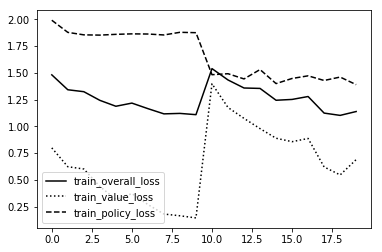

<Figure size 432x288 with 0 Axes>

In [303]:
agent.replay(memory.ltmemory)

In [304]:
N_GAMES = 50
wins = 0
movs = []
for k in range(1, N_GAMES+1):
    win, mov, memory = simgame(game, agent, logger_simgame, memory)
    if win == 1:
        wins += 1
        movs.append(mov)    
    if k%5 == 0:
        print("%d games played so far, %d wins (%.2f %%), %.2f movs avg" % (k, wins, wins*100.0/k, np.array(movs).mean()))

5 games played so far, 3 wins (60.00 %), 4.33 movs avg
10 games played so far, 8 wins (80.00 %), 6.50 movs avg
15 games played so far, 11 wins (73.33 %), 7.55 movs avg
20 games played so far, 14 wins (70.00 %), 7.93 movs avg
25 games played so far, 19 wins (76.00 %), 8.26 movs avg
30 games played so far, 21 wins (70.00 %), 8.00 movs avg
35 games played so far, 26 wins (74.29 %), 8.46 movs avg
40 games played so far, 27 wins (67.50 %), 8.70 movs avg
45 games played so far, 29 wins (64.44 %), 8.86 movs avg
50 games played so far, 30 wins (60.00 %), 8.93 movs avg


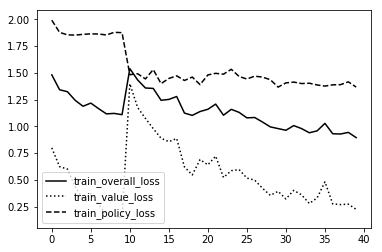

In [ ]:
N_GAMES = 50
wins = 0
movs = []
for k in range(1, N_GAMES+1):
    win, mov, memory = simgame(game, agent, logger_simgame, memory)
    if win == 1:
        wins += 1
        movs.append(mov)    
    if k%5 == 0:
        print("%d games played so far, %d wins (%.2f %%), %.2f movs avg" % (k, wins, wins*100.0/k, np.array(movs).mean()))
        print("Retraining...")
        agent.replay(memory.ltmemory)